<a href="https://colab.research.google.com/github/Dennis-LCLema/Sustainable-Tourism-Sring2025/blob/main/Bus_Electrification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Listed below are all the libraries you
# will need for this assignment. Run this
# code chunk everytime you open this file.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io

In [2]:
# Fixed Parameters
#Simulation
num_simulations = 100  # Number of Simulations
num_years = 20    # Number of Years in each Simulation
minimum_daily_cruise_passengers = 5000
maximum_daily_cruise_passengers = 15000
minimum_daily_independent_tourist = 100
maximum_daily_independent_tourists = 1000
electric_bus_capacity = 80   # number of passengers an electric bus can carry comfortably.

#Bus parameters.
electric_bus_value = 825000           #average price of a new electric bus.
charging_equipment = 75000            #average cost of a new charging equipment that can charge 5 buses.
installation_cost = 30000             #average cost of installing a charging equipment.
cruise_passenger_transport = 0.375      #percentage of cruise passengers that use public transport.
independent_tourist_transport = 0.25    #percentage of independent passengers that use public transport.
buses_served_per_station = 5           #number of buses served by each charging station.

#Operating and maintenance costs.
charger_operational_cost = (6500/12/30) #average cost of operating a charging station per day.
gas_station_operating_cost = (2000/30)     #cost of operating a gas station per day for diesel buses.
electricity_cost_per_mile = 0.28  #the cost of electricity per mile for new electric buses.
fuel_cost_per_mile = 0.59  #the cost of fuel per mile for new diesel buses.
electric_bus_maintenance_cost = 0.55 #maintenace cost of an electric bus per mile.
diesel_bus_maintenance_cost = 1.53 #maintenace cost of a diesel bus per mile.
driver_salary = 45000  # average salary of a bus driber in Juneau.

#emission reduction.
diesel_bus_CO2 = 2680   #average grams of CO2 per mile relesaed by a diesel bus.
electric_bus_CO2 = 1209  #average grams of CO2 per mile relesaed by an electric bus.
distance = 11.7    #The distance from Juneau downtown to Mendenhall glacier is 11.7 miles.

#initialize lists for outputs.
initial_cost_of_electrifying_list = []  # Use a list to store intial cost of electrifying
electric_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
diesel_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
total_emission_reduction_list = []  # Use a list to store total emission reductions
total_savings_list = []  # Use a list to store total savings
total_electric_bus_CO2_list = []  # Use a list to store total CO2 emissions from electric buses
total_diesel_bus_CO2_list = []  # Use a list to store total CO2 emissions from diesel buses

#Monte Carlo simulation loop.
for number_of_simulations in range (num_simulations):

  #initialize list for yearly calculations.
  yearly_emission_reduction = []
  yearly_electric_maintenance_and_operation_cost = []
  yearly_diesel_maintenance_and_operation_cost = []
  yearly_saving = []
  yearly_electric_bus_CO2 = []
  yearly_diesel_bus_CO2 = []

  for year in range (num_years):
    #initialize list for daily calculations.
    daily_emission_reduction = [] # This should remain a list to append values later
    daily_electric_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_diesel_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_saving = [] # This should remain a list to append values later
    daily_electric_bus_CO2 = [] # This should remain a list to append values later
    daily_diesel_bus_CO2 = [] # This should remain a list to append values later
    season_length = np.random.randint(120, 151)

    for days in range (season_length):
        # ✅ **normal distribution for cruise passengers**
        average_daily_cruise_passengers = int((maximum_daily_cruise_passengers + minimum_daily_cruise_passengers) / 2)
        daily_cruise_mu = average_daily_cruise_passengers
        optimal_daily_cruise_passengers = int((maximum_daily_cruise_passengers - average_daily_cruise_passengers) / 3) # within 3 standard deviations
        cruise_passengers = np.random.normal(loc=average_daily_cruise_passengers, scale=optimal_daily_cruise_passengers)

         # ✅ **normal distribution for independent tourists**
        average_daily_independent_tourists = int((maximum_daily_independent_tourists + minimum_daily_independent_tourist) / 2)
        daily_ind_mu = average_daily_independent_tourists
        optimal_daily_independent_tourists = int((maximum_daily_independent_tourists - average_daily_independent_tourists) / 3) # within 3 standard deviations
        independent_tourists = np.random.normal(loc=average_daily_independent_tourists, scale=optimal_daily_independent_tourists)

        #proportion of daily passengers that use public transport.
        cruise_passenger_public = cruise_passengers * cruise_passenger_transport
        independent_tourist_public = independent_tourists * independent_tourist_transport
        daily_public = int(cruise_passenger_public + independent_tourist_public)

        #number of buses  and stations needed.
        number_of_buses = int(daily_public) / electric_bus_capacity
        number_of_charging_stations_needed = int(number_of_buses / buses_served_per_station)

        #operation and maintenance cost of electric bus.
        daily_operation_cost = number_of_buses * electricity_cost_per_mile * distance
        daily_maintenance_cost = number_of_buses * electric_bus_maintenance_cost * distance
        daily_maintenance_and_operation_cost_electric_value = charger_operational_cost + daily_operation_cost + daily_maintenance_cost

        #operation and maintenance cost of diesel bus.
        daily_diesel_bus_maintenance_cost = number_of_buses * diesel_bus_maintenance_cost * distance
        daily_operation_cost = number_of_buses * fuel_cost_per_mile * distance
        daily_maintenance_and_operation_cost_diesel_value = daily_diesel_bus_maintenance_cost + daily_operation_cost + gas_station_operating_cost

        #savings made on maintenance and operating.
        daily_saving_value = daily_maintenance_and_operation_cost_diesel_value - daily_maintenance_and_operation_cost_electric_value # Calculate the value and assign to a new variable

        #emission values of electric and diesel bus.
        daily_electric_bus_CO2_value = number_of_buses * electric_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_diesel_bus_CO2_value = number_of_buses * diesel_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_emission_reduction_value = daily_diesel_bus_CO2_value - daily_electric_bus_CO2_value # Calculate the value and assign to a new variable

                #append daily outputs to lists.
        daily_electric_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_electric_value)#append calculated value to the list.
        daily_diesel_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_diesel_value)#append calculated value to the list.
        daily_emission_reduction.append(daily_emission_reduction_value) # Append the calculated value to the list.
        daily_saving.append(daily_saving_value) # Append the calculated value to the list.
        daily_electric_bus_CO2.append(daily_electric_bus_CO2_value) # Append the calculated value to the list.
        daily_diesel_bus_CO2.append(daily_diesel_bus_CO2_value) # Append the calculated value to the list.

      # Create the DataFrame for daily values outside the inner loop
    day_df = pd.DataFrame({
        'Day': range(1, season_length + 1),
        'Electric Bus Maintenance and Operation Cost': daily_maintenance_and_operation_cost_electric_value,
        'Diesel Bus Maintenance and Operation Cost': daily_maintenance_and_operation_cost_diesel_value,
        'Emission Reduction': daily_emission_reduction_value,
        'Savings': daily_saving,
        'Electric Bus CO2': daily_electric_bus_CO2,
        'Diesel Bus CO2': daily_diesel_bus_CO2
    })

    #append yearly outputs to lists.
    yearly_electric_maintenance_and_operation_cost.append(sum(daily_electric_maintenance_and_operation_cost))
    yearly_diesel_maintenance_and_operation_cost.append(sum(daily_diesel_maintenance_and_operation_cost))
    yearly_emission_reduction.append(sum(daily_emission_reduction))
    yearly_saving.append(sum(daily_saving))
    yearly_electric_bus_CO2.append(sum(daily_electric_bus_CO2))
    yearly_diesel_bus_CO2.append(sum(daily_diesel_bus_CO2))


    #Create a dataframe for the current year.
  year_df = pd.DataFrame({
      'Year': np.arange(1, num_years + 1),
      'Electric_Maintenance and Operation Cost': yearly_electric_maintenance_and_operation_cost,
      'Diesel Bus Maintenance and Operation Cost': yearly_diesel_maintenance_and_operation_cost,
      'Savings': yearly_saving,
      'Emission Reduction': yearly_emission_reduction,
      'Electric Bus CO2': yearly_electric_bus_CO2,
      'Diesel Bus CO2': yearly_diesel_bus_CO2
      })

    # Reset daily lists for the next year
  daily_emission_reduction = []
  daily_maintenance_and_operation_cost = []
  daily_saving = []
  daily_electric_bus_CO2 = []
  daily_diesel_bus_CO2 = []

  #initial cost of electrifying is calculated once every simulation.
  initial_cost_of_electrifying = (electric_bus_value*number_of_buses) + (charging_equipment*number_of_charging_stations_needed) + (installation_cost*number_of_charging_stations_needed)


  #append simulation outputs to lists.
  electric_maintenance_and_operating_cost_list.append(sum(yearly_electric_maintenance_and_operation_cost))
  diesel_maintenance_and_operating_cost_list.append(sum(yearly_diesel_maintenance_and_operation_cost))
  total_emission_reduction_list.append(sum(yearly_emission_reduction))
  total_savings_list.append(sum(yearly_saving))
  total_electric_bus_CO2_list.append(sum(yearly_electric_bus_CO2))
  total_diesel_bus_CO2_list.append(sum(yearly_diesel_bus_CO2))
  initial_cost_of_electrifying_list.append(initial_cost_of_electrifying)

#Create a dataframe for simulation values.
simulation_df = pd.DataFrame({
    'Simulation': range(1, num_simulations + 1),
    'Initial Cost of Electrifying': initial_cost_of_electrifying_list,
    'Electric Bus Maintenance and Operating Cost': electric_maintenance_and_operating_cost_list,
    'Diesel Bus Maintenance and Operating Cost': diesel_maintenance_and_operating_cost_list,
    'Total Savings': total_savings_list,
    'Total Emission Reduction': total_emission_reduction_list,
    'Total Electric Bus CO2': total_electric_bus_CO2_list,
    'Total Diesel Bus CO2': total_diesel_bus_CO2_list
})

# Print the simulation results
simulation_df.describe()

,Simulation,Initial Cost of Electrifying,Electric Bus Maintenance and Operating Cost,Diesel Bus Maintenance and Operating Cost,Total Savings,Total Emission Reduction,Total Electric Bus CO2,Total Diesel Bus CO2
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,50.500000,4.265272e+07,1.322609e+06,3.433715e+06,2.111106e+06,4.515281e+09,3.711064e+09,8.226345e+09
std,29.011492,6.359075e+06,1.920899e+04,4.983090e+04,3.062210e+04,6.570220e+07,5.399997e+07,1.197022e+08
min,1.000000,2.628750e+07,1.264554e+06,3.282961e+06,2.018407e+06,4.317193e+09,3.548257e+09,7.865450e+09
25%,25.750000,3.872484e+07,1.314300e+06,3.412063e+06,2.097763e+06,4.487170e+09,3.687959e+09,8.175129e+09
50%,50.500000,4.304766e+07,1.325600e+06,3.441496e+06,2.115896e+06,4.525447e+09,3.719419e+09,8.244865e+09
75%,75.250000,4.708945e+07,1.331928e+06,3.457673e+06,2.125830e+06,4.547628e+09,3.737650e+09,8.285278e+09
max,100.000000,5.612438e+07,1.400699e+06,3.636233e+06,2.235534e+06,4.782554e+09,3.930733e+09,8.713287e+09


In [3]:
year_df.describe()

,Year,Electric_Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Savings,Emission Reduction,Electric Bus CO2,Diesel Bus CO2
count,20.00000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,2.000000e+01
mean,10.50000,65778.358293,170774.986778,104996.628485,2.245518e+08,1.845569e+08,4.091087e+08
std,5.91608,4541.095357,11759.418860,7218.357357,1.559703e+07,1.281904e+07,2.841606e+07
min,1.00000,59580.980785,154669.158417,95088.177632,2.034455e+08,1.672098e+08,3.706554e+08
25%,5.75000,62355.155399,161945.078983,99589.923585,2.126868e+08,1.748051e+08,3.874920e+08
50%,10.50000,64679.381072,167968.988067,103289.606994,2.206532e+08,1.813526e+08,4.020059e+08
75%,15.25000,68017.337145,176566.772787,108549.435643,2.322609e+08,1.908929e+08,4.231537e+08
max,20.00000,75242.584246,195268.207150,120025.622904,2.571033e+08,2.113106e+08,4.684140e+08


In [4]:
day_df.describe()

,Day,Electric Bus Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Emission Reduction,Savings,Electric Bus CO2,Diesel Bus CO2
count,137.000000,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,1.370000e+02,1.370000e+02
mean,69.000000,4.654899e+02,1.209511e+03,1.585966e+06,784.597295,1.379546e+06,3.058051e+06
std,39.692569,7.416763e-13,1.369248e-12,3.271591e-09,114.023782,2.137283e+05,4.737732e+05
min,1.000000,4.654899e+02,1.209511e+03,1.585966e+06,459.140711,7.695043e+05,1.705766e+06
25%,35.000000,4.654899e+02,1.209511e+03,1.585966e+06,704.779286,1.229934e+06,2.726404e+06
50%,69.000000,4.654899e+02,1.209511e+03,1.585966e+06,785.149511,1.380581e+06,3.060346e+06
75%,103.000000,4.654899e+02,1.209511e+03,1.585966e+06,865.708399,1.531582e+06,3.395071e+06
max,137.000000,4.654899e+02,1.209511e+03,1.585966e+06,1177.190186,2.115430e+06,4.689290e+06


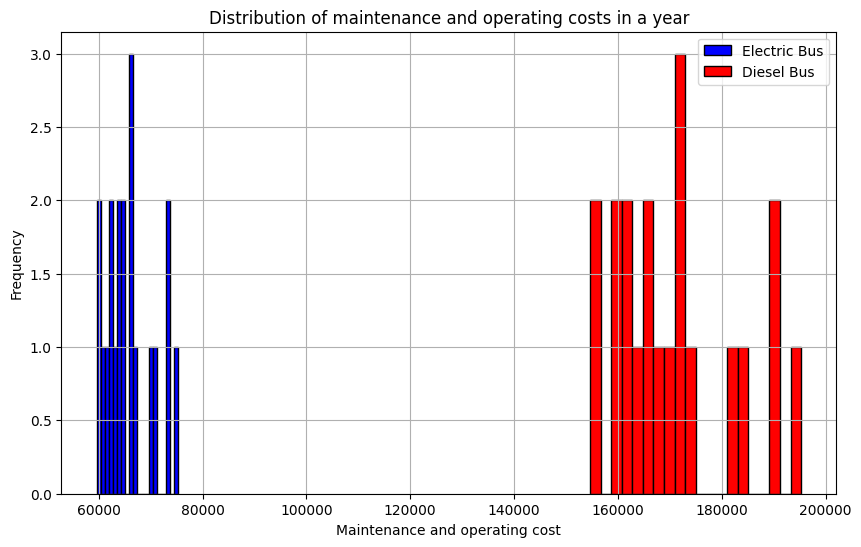

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(year_df['Electric_Maintenance and Operation Cost'], bins=20, color='blue', edgecolor='black', label = 'Electric Bus') # Changed column name to match year_df
plt.hist(year_df['Diesel Bus Maintenance and Operation Cost'], bins=20, color='red', edgecolor='black', label = 'Diesel Bus')
plt.xlabel('Maintenance and operating cost')
plt.ylabel('Frequency')
plt.title('Distribution of maintenance and operating costs in a year')
plt.legend()
plt.grid(True)
plt.show()

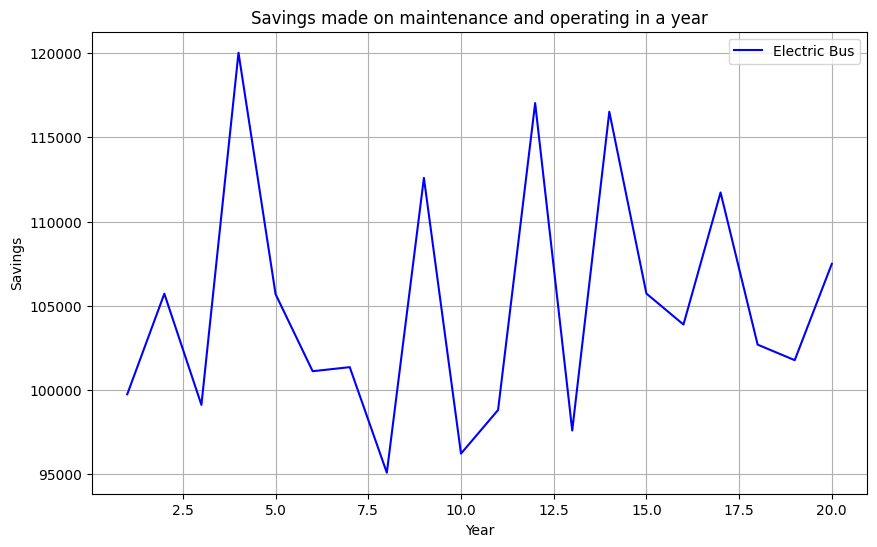

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Savings'], label='Electric Bus', color='blue')
plt.xlabel('Year')
plt.ylabel('Savings')
plt.title('Savings made on maintenance and operating in a year')
plt.legend()
plt.grid(True)
plt.show()

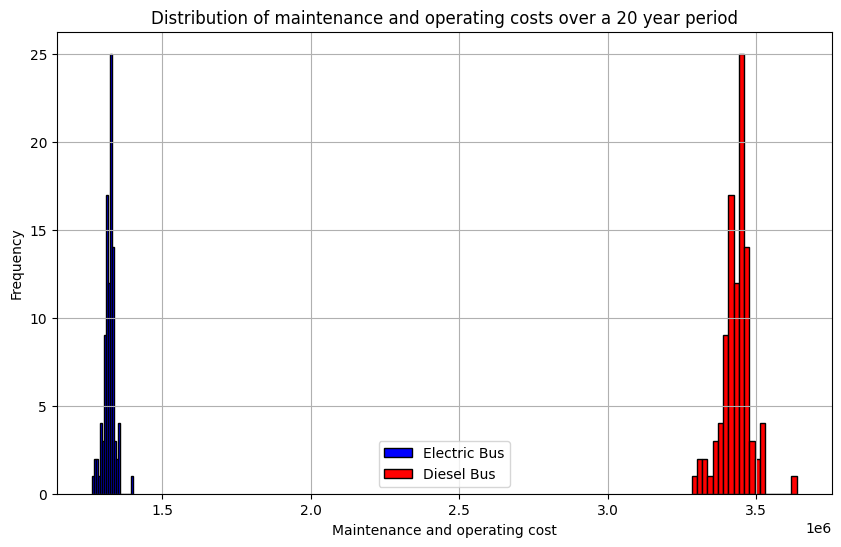

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(simulation_df['Electric Bus Maintenance and Operating Cost'], bins=20, color='blue', edgecolor='black', label = 'Electric Bus')
plt.hist(simulation_df['Diesel Bus Maintenance and Operating Cost'], bins=20, color='red', edgecolor='black', label = 'Diesel Bus')
plt.xlabel('Maintenance and operating cost')
plt.ylabel('Frequency')
plt.title('Distribution of maintenance and operating costs over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

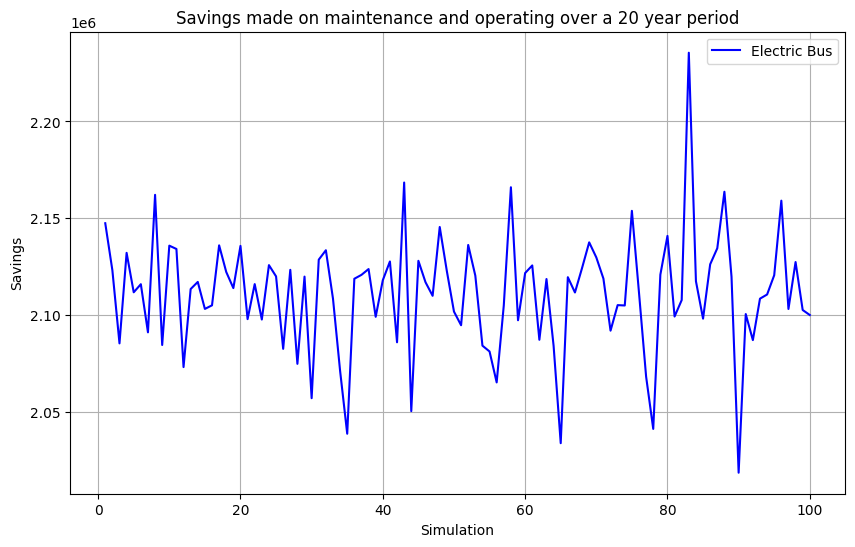

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Savings'], label='Electric Bus', color='blue')
plt.xlabel('Simulation')
plt.ylabel('Savings')
plt.title('Savings made on maintenance and operating over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

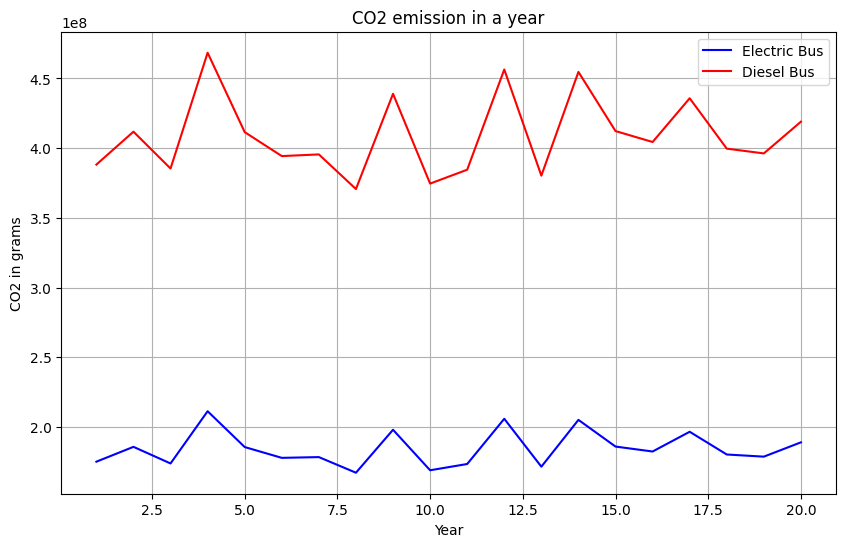

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Electric Bus CO2'], label='Electric Bus', color='blue')
plt.plot(year_df['Year'], year_df['Diesel Bus CO2'], label='Diesel Bus', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 in grams')
plt.title('CO2 emission in a year')
plt.legend()
plt.grid(True)
plt.show()

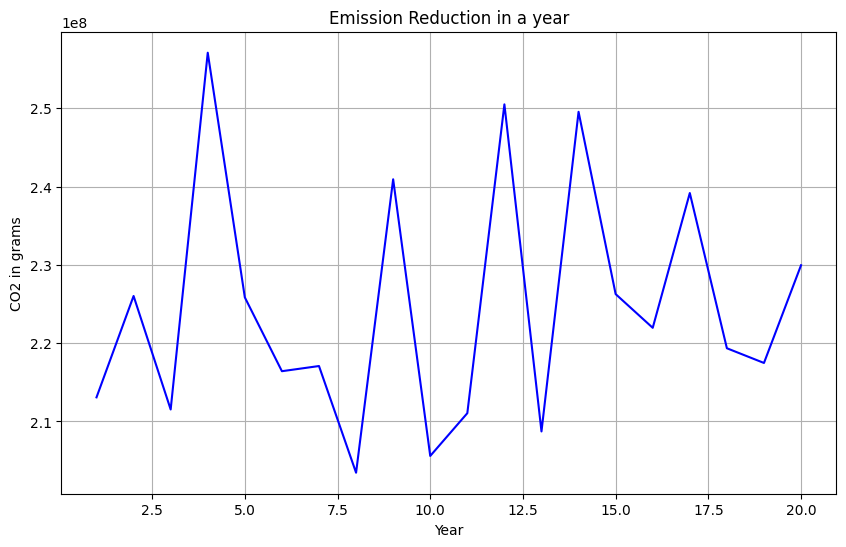

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Emission Reduction'], color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 in grams')
plt.title('Emission Reduction in a year')
plt.grid(True)
plt.show()

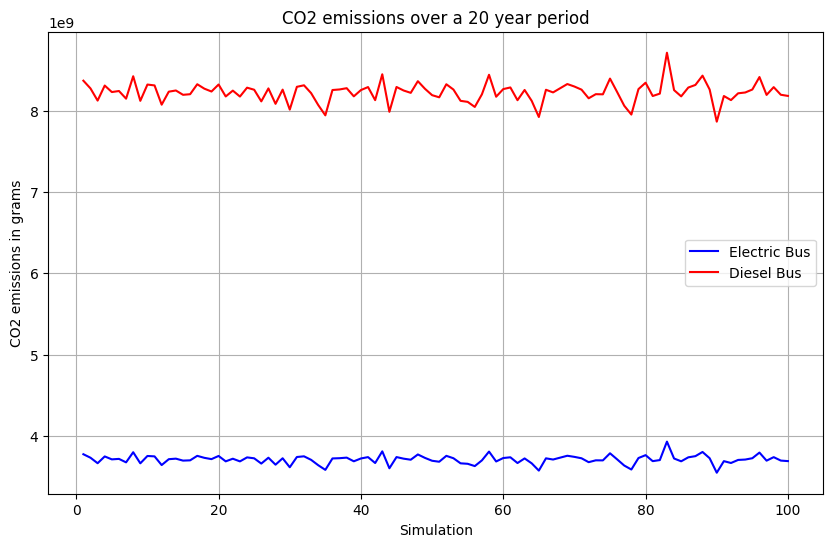

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Electric Bus CO2'], label='Electric Bus', color='blue')
plt.plot(simulation_df['Simulation'], simulation_df['Total Diesel Bus CO2'], label='Diesel Bus', color='red')
plt.xlabel('Simulation')
plt.ylabel('CO2 emissions in grams')
plt.title('CO2 emissions over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

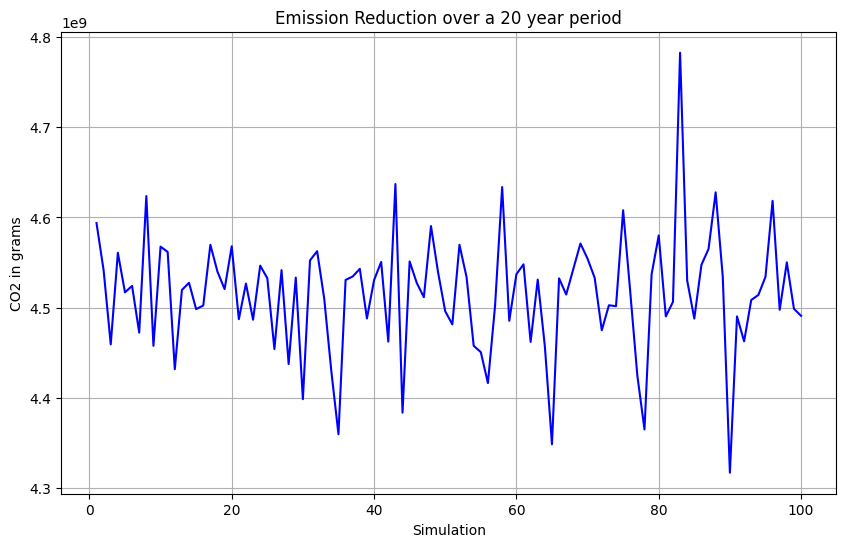

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Emission Reduction'], color='blue')
plt.xlabel('Simulation')
plt.ylabel('CO2 in grams')
plt.title('Emission Reduction over a 20 year period')
plt.grid(True)
plt.show()